In [5]:
import math
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import pickle

In [2]:
from scipy.optimize import curve_fit

In [3]:
import matlab.engine

eng = matlab.engine.start_matlab()

# Seperate Dataset

Our dataset needs to be converted so that the relationship between hurst exponent (HE) and forecaster error can be established across 20-30 datapoints, as in figure 1.

c:\program files\python36\lib\site-packages\scipy\optimize\minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([1., 1., 1.]), array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

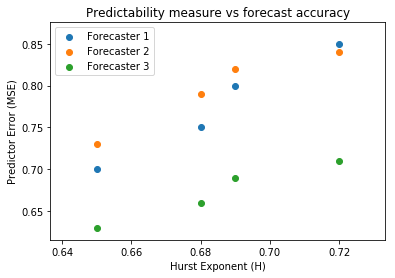

In [18]:
plt.scatter([0.65, 0.68, 0.69, 0.72], [0.7, 0.75, 0.8, 0.85])
plt.scatter([0.65, 0.68, 0.69, 0.72], [0.73, 0.79, 0.82, 0.84],)
plt.scatter([0.65, 0.68, 0.69, 0.72], [0.63, 0.66, 0.69, 0.71])

plt.xlabel('Hurst Exponent (H)')
plt.ylabel('Predictor Error (MSE)')
plt.title('Predictability measure vs forecast accuracy')
plt.legend(['Forecaster 1', 'Forecaster 2', 'Forecaster 3'])

# Fit a curve
curve_fit(lambda x, a, b, c: x, [0.65, 0.68, 0.69, 0.72], [0.7, 0.75, 0.8, 0.85])

Generate data by filtering with different lengths. Using causal moving average filters. Apply 4 or 5 moving average.

### Load the dataset

In [28]:
dataset = pd.read_csv('data.csv',  names = ["irregular"])

In [19]:
d = pickle.load(open('all_data_15', 'rb+'))

In [24]:
len(d[0])

15

In [28]:
dataset = pd.DataFrame(np.array([a for a in d[0] ]).reshape(1294560 ), columns = ["irregular"])

In [29]:
dataset.shape

(1294560, 1)

In [30]:
dataset.head()

,irregular
0,39.140
1,39.066
2,38.992
3,38.919
4,38.845


### Seperate and calculate H

https://www.sciencedirect.com/science/article/pii/S0378437108000824 - Used 10 years daily (3,560) samples.

20 - 30 datapoints are desired for this analysis. Due to usages of data volumes well below this in the literature this may be reasonable. 

This will be further validated by calculating the Hurst Exponent using 3-5 different methods and comparing the standard deviation between these methods to that of the literature and larger dataset.

Overlap the data with 20% of the start and end overlapping.

In [36]:
dataset.shape[0] / 30

43152.0

In [32]:
dataset['irregular'] = causal_MVA(dataset.values, 45)

In [33]:
HMethods = ['Agr Var.', 'Peng', 'Higuchi', 'Abs val.', 'RS', 'Box per.', 'Diff var.']

In [39]:
indexes = []
HConfidence = []
splitData = []

n = 15
o = 1.0
r = len(dataset)

s = r // n
initS = s
offset = math.ceil(s * (1 - o))
r = r - offset
s = r // n

print(s, o)
c = offset
for i in range(0, n):
    # Split with offsets
    i1, i2 = c - round(initS * (1 - o)), c + s
    
    c = int(c + s)
    print(i1, i2)
    
    splitData.append(dataset.values[i1 : i2].tolist())
    
    #print(int((i * dataset.shape[0]) / 30), int( ((i + 1) * dataset.shape[0]) / 30))
    #i1, i2 = int((i * dataset.shape[0]) / 30), int( ((i + 1 ) * dataset.shape[0]) / 30)
    
    # Pass data to matlab
    mData =  matlab.double(dataset.values[i1 : i2].tolist())
    indexes.append((i1, i2))
    #indexes.append((int((i * dataset.shape[0]) / 30), int( ((i + 1 ) * dataset.shape[0]) / 30)))
    
    HConfidence.append([])
    HConfidence[-1].append(eng.aggvar(mData, 0))
    HConfidence[-1].append(eng.peng(mData, 0))
    HConfidence[-1].append(eng.higuchi(mData, 0))
    HConfidence[-1].append(eng.absval(mData, 0))
    HConfidence[-1].append(eng.RS(mData, 0))
    HConfidence[-1].append(eng.boxper(mData, 0))
    HConfidence[-1].append(eng.diffvar(mData, 0))
#     HConfidence[-1].append(eng.per(mData, 0))
    


86304 1.0
0 86304
86304 172608
172608 258912
258912 345216
345216 431520
431520 517824
517824 604128
604128 690432
690432 776736
776736 863040
863040 949344
949344 1035648
1035648 1121952
1121952 1208256
1208256 1294560


In [41]:
pickle.dumps(HConfidence)

b'\x80\x03]q\x00(]q\x01(G?\xedWS$\x11/\xfcG?\xf50\xc9\x02\x00.XG?\xedA\x927\x1e\x9bvG?\xed;t\xa6\x8a\xea\x87G?\xe4\xfex\xef\xc1*\xf1G?\xfb\x9a\xef\x0c\x08@JG?\xfa\xe5\xb6m\x8f\x08\xeee]q\x02(G?\xecD\xb6\xa8\xe5\x13VG?\xf3\xf3c\x99\x0c*\xb5G?\xec\xe7\xce\xff\xfa\xfc\x94G?\xechKP\x8c=\xaaG?\xe4\xaex\xb5\xb5\xec`G?\xfb$\xf8U\xb7\xd6\xb6G?\xfaMV\x1bq\x93Xe]q\x03(G?\xecYk\xeb\xe2b\xefG?\xf3\xa0\xf6\\\xca\xe7\x90G?\xec\xc5\xc5%\xc6\x9a\xbcG?\xec\xb1H\xc0\xf4b9G?\xe5LPa\xcf\xb7\x0fG?\xfao\xb6)\xb5j\xbdG?\xf7\xfdr\xf8\x95\xf9\x84e]q\x04(G?\xec\xf1rY\xe7\x0e\xc5G?\xf4|\xb1\x87\xf2"\x13G?\xec\xfaI\x168\xaa\xc6G?\xed\x00\xc8\xfbf3;G?\xe5\x86(nqc\x07G?\xfa\x83\xaf\xf6\x1b\x19\xb4G?\xf9\x86\xa7\xe9y\x89\x86e]q\x05(G?\xeb\xe5<\xa7dH\xbaG?\xf2zJ\x84\xf8\x06\xb1G?\xecB\xcec\x96\xd8\x9eG?\xecU\xc7\xe31\xdf\xccG?\xe4A\xdb\x8b\xdf\x99\xa2G?\xf95/\xd3\x0c\xf6\xf2G?\xf7`\xa2\xb0\xa6\x15\x84e]q\x06(G?\xec\xff\xa5\x9c\x81j^G?\xf4\x94Te&\xb8\xbdG?\xec\xe7\x9a\xdf\xcc\xd3\x1aG?\xec\xef8\xf7\xf3-\x11G?\xe5q\x8d

In [93]:
dataset.shape

(1294560, 1)

In [94]:
for HValues in HConfidence:
    values = []

    for i, H in enumerate(HValues):    
        if i in [0, 2, 3]:
            print(str(HMethods[i]).ljust(15), round(H, 5))
            values.append(H)
        
    values = np.array(values)
    print("Mean: ", round(np.mean(values), 3), "   Stddiv: ", round(np.std(values), 4))
    print()


Agr Var.        0.89772
Higuchi         0.89716
Abs val.        0.89714
Mean:  0.897    Stddiv:  0.0003

Agr Var.        0.85362
Higuchi         0.87881
Abs val.        0.86618
Mean:  0.866    Stddiv:  0.0103

Agr Var.        0.8462
Higuchi         0.86616
Abs val.        0.86133
Mean:  0.858    Stddiv:  0.0085

Agr Var.        0.87743
Higuchi         0.87993
Abs val.        0.88206
Mean:  0.88    Stddiv:  0.0019

Agr Var.        0.82076
Higuchi         0.83908
Abs val.        0.84223
Mean:  0.834    Stddiv:  0.0095

Agr Var.        0.88613
Higuchi         0.88167
Abs val.        0.88502
Mean:  0.884    Stddiv:  0.0019

Agr Var.        0.87369
Higuchi         0.8783
Abs val.        0.86963
Mean:  0.874    Stddiv:  0.0035

Agr Var.        0.88284
Higuchi         0.89249
Abs val.        0.88622
Mean:  0.887    Stddiv:  0.004

Agr Var.        0.84914
Higuchi         0.86062
Abs val.        0.8599
Mean:  0.857    Stddiv:  0.0052

Agr Var.        0.85375
Higuchi         0.86582
Abs val.    

In [25]:
# Pass data to matlab
mData =  matlab.double(dataset.values[:].tolist())
indexes.append((int((i * dataset.shape[0]) / 30), int( ((i + 1 ) * dataset.shape[0]) / 30)))

HFull = []
HFull.append(eng.aggvar(mData, 0))
HFull.append(eng.peng(mData, 0))
HFull.append(eng.higuchi(mData, 0))
HFull.append(eng.absval(mData, 0))
HFull.append(eng.RS(mData, 0))
HFull.append(eng.boxper(mData, 0))
HFull.append(eng.diffvar(mData, 0))

### Compare H across methods

#### H from all data: 

### H from split

In [95]:
HPlotValues = []

for HValues in HConfidence:
    values = []
    for i, H in enumerate(HValues):
        if i in [0, 2, 3]:
            values.append(H)
    values = np.array(values)
    
    HPlotValues.append([np.round(np.mean(values), 4), np.round(np.std(values), 4)])
    print(np.round(np.mean(values), 4), np.round(np.std(values), 4))

HPlotValues = np.array(HPlotValues)

0.8973 0.0003
0.8662 0.0103
0.8579 0.0085
0.8798 0.0019
0.834 0.0095
0.8843 0.0019
0.8739 0.0035
0.8872 0.004
0.8566 0.0052
0.8615 0.0055
0.8542 0.0033
0.8775 0.0032
0.8617 0.0098
0.9029 0.0008
0.8683 0.0037


### Plot the H values

Text(0,0.5,'Hurst Exponent')

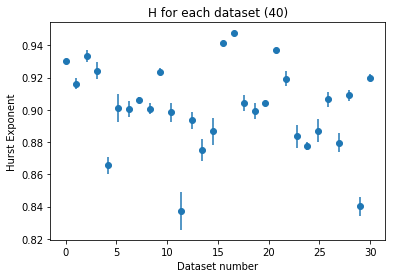

In [20]:
HPlotValues[HPlotValues[:,1].argsort()]

plt.errorbar(np.linspace(0, len(HPlotValues), len(HPlotValues)), HPlotValues[:, 0], yerr=HPlotValues[:, 1], fmt='o')

plt.title('H for each dataset (40)')
plt.xlabel('Dataset number')
plt.ylabel('Hurst Exponent')

Text(0,0.5,'Hurst Exponent')

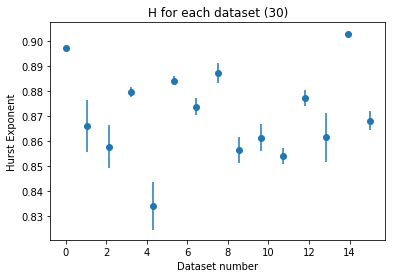

In [96]:
HPlotValues[HPlotValues[:,1].argsort()]

plt.errorbar(np.linspace(0, len(HPlotValues), len(HPlotValues)), HPlotValues[:, 0], yerr=HPlotValues[:, 1], fmt='o')

plt.title('H for each dataset (30)')
plt.xlabel('Dataset number')
plt.ylabel('Hurst Exponent')

Text(0,0.5,'Hurst Exponent')

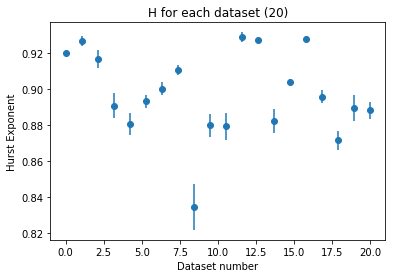

In [86]:
HPlotValues[HPlotValues[:,1].argsort()]

plt.errorbar(np.linspace(0, len(HPlotValues), len(HPlotValues)), HPlotValues[:, 0], yerr=HPlotValues[:, 1], fmt='o')

plt.title('H for each dataset (20)')
plt.xlabel('Dataset number')
plt.ylabel('Hurst Exponent')

### With 20% overlap - 30 split

Text(0,0.5,'Hurst Exponent')

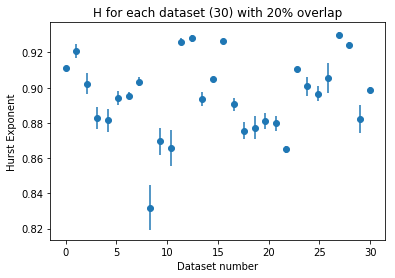

In [12]:
HPlotValues[HPlotValues[:,1].argsort()]

plt.errorbar(np.linspace(0, len(HPlotValues), len(HPlotValues)), HPlotValues[:, 0], yerr=HPlotValues[:, 1], fmt='o')

plt.title('H for each dataset (30) with 20% overlap')
plt.xlabel('Dataset number')
plt.ylabel('Hurst Exponent')

## Causal MVA of length 10

Text(0,0.5,'Hurst Exponent')

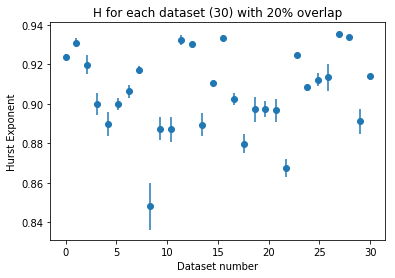

In [43]:
HPlotValues[HPlotValues[:,1].argsort()]

plt.errorbar(np.linspace(0, len(HPlotValues), len(HPlotValues)), HPlotValues[:, 0], yerr=HPlotValues[:, 1], fmt='o')

plt.title('H for each dataset (30) with 20% overlap')
plt.xlabel('Dataset number')
plt.ylabel('Hurst Exponent')

##  Causal MVA of length 30

Text(0,0.5,'Hurst Exponent')

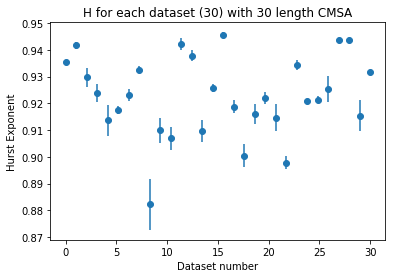

In [54]:
HPlotValues[HPlotValues[:,1].argsort()]

plt.errorbar(np.linspace(0, len(HPlotValues), len(HPlotValues)), HPlotValues[:, 0], yerr=HPlotValues[:, 1], fmt='o')

plt.title('H for each dataset (30) with 30 length CMSA')
plt.xlabel('Dataset number')
plt.ylabel('Hurst Exponent')

##  Causal 15 splits, MVA of length 10

Text(0,0.5,'Hurst Exponent')

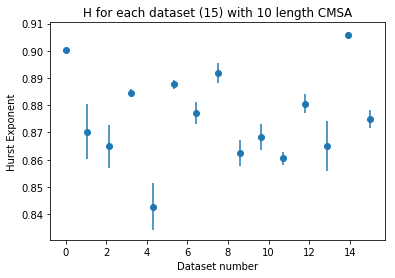

In [88]:
HPlotValues[HPlotValues[:,1].argsort()]

plt.errorbar(np.linspace(0, len(HPlotValues), len(HPlotValues)), HPlotValues[:, 0], yerr=HPlotValues[:, 1], fmt='o')

plt.title('H for each dataset (15) with 10 length CMSA')
plt.xlabel('Dataset number')
plt.ylabel('Hurst Exponent')

## All Causals

Text(0,0.5,'Hurst Exponent')

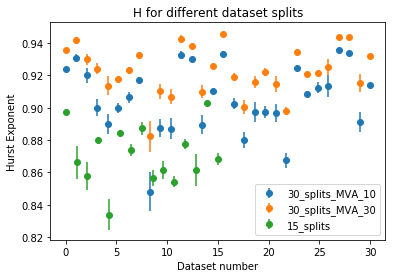

In [104]:
for hvals in [H_30_10, H_30_30, H_30]:
    plt.errorbar(np.linspace(0, len(hvals), len(hvals)), hvals[:, 0], yerr=hvals[:, 1], fmt='o')

plt.legend(['30_splits_MVA_10', '30_splits_MVA_30', '15_splits'])
plt.title('H for different dataset splits')
plt.xlabel('Dataset number')
plt.ylabel('Hurst Exponent')

#### Save the data

In [4]:
import pickle

# pickle.dump(HPlotValues, open('splits_15', 'wb+'))

In [10]:
H_30_10 = pickle.load(open('splits_30_causal_10', 'rb+'))
H_30_30 = pickle.load(open('splits_30_causal_30', 'rb+'))
H_15    = pickle.load(open('splits_15', 'rb+'))

In [14]:
print(H_15)

[[8.973e-01 3.000e-04]
 [8.662e-01 1.030e-02]
 [8.579e-01 8.500e-03]
 [8.798e-01 1.900e-03]
 [8.340e-01 9.500e-03]
 [8.843e-01 1.900e-03]
 [8.739e-01 3.500e-03]
 [8.872e-01 4.000e-03]
 [8.566e-01 5.200e-03]
 [8.615e-01 5.500e-03]
 [8.542e-01 3.300e-03]
 [8.775e-01 3.200e-03]
 [8.617e-01 9.800e-03]
 [9.029e-01 8.000e-04]
 [8.683e-01 3.700e-03]]


### Matlab testing 

In [9]:
# Pass data to matlab
mData =  matlab.double(dataset.values[: int(dataset.shape[0] / 30)].tolist())

In [11]:
val = eng.aggvar(mData, 0)

## Clustering of data

K-Metriods - use to clusters days.

Avoid for now as it has alot of issues to address.

Markov model, NN

In [55]:
a = np.array([1,2,3,4])
b = np.zeros(4)

b[:2] = a[:2]

print(a, b)


[1 2 3 4] [1. 2. 0. 0.]


## Apply filtering

Apply a causal moving average filter to generate additional datasets. Filter lengths to come for Ali.

In [12]:
def causal_MVA(dataset, horizon):    
    result = np.zeros(len(dataset))
    
    result[: horizon] = dataset[: horizon].reshape(horizon)
    
    for i in range(horizon, len(dataset)):
        result[i] = (np.mean(dataset[i - horizon : i]))
        
    return result

Random walk

In [9]:
walk = []

c = 0
for v in np.random.randn(100):
    c = c + v
    walk.append(c)
    
walk = np.array(walk)

In [10]:
walk

array([-0.36963111, -0.7888192 , -0.93194073, -1.75756126, -1.13967401,
       -0.70546216, -0.36988176, -0.32111469,  0.2922177 ,  1.95045408,
        2.66975941,  1.35794397,  1.82014087,  2.95444841,  2.35877975,
        0.46459986,  1.2619483 ,  0.26170092, -1.37533176, -0.35700143,
       -0.02545483,  1.51813513,  0.29830393, -0.73285347,  0.7199377 ,
        2.17955204,  1.1452321 , -0.29830727,  0.65198947,  0.24388264,
        0.86338018,  0.64930223,  1.69996605,  2.64539554,  3.33177915,
        3.2787218 ,  2.35449372,  3.2291774 ,  3.4494146 ,  2.9670522 ,
        2.67514583,  3.72752521,  3.23527301,  4.01840878,  4.35042572,
        3.26505385,  2.95556852,  2.18648068,  3.14379943,  2.2093891 ,
        2.59652047,  2.66263993,  0.5149064 ,  1.9681933 ,  1.05058971,
        1.29423735, -0.10137003, -1.14061665, -2.65859134, -1.8715203 ,
       -1.65394448, -0.96075953, -0.97655008,  0.49945051, -0.15598866,
        2.13430951,  1.7590044 ,  1.84527334,  1.03447406,  2.69

In [15]:
mva_walk = causal_MVA(walk, 10)

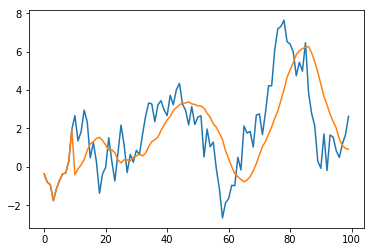

In [16]:
plt.plot(walk)
plt.plot(mva_walk)

In [17]:
len(walk)

100

In [14]:
len(mva_walk)

100